In [2]:
from scipy.signal import spectrogram
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

In [6]:
fs,x=wavfile.read('1.wav')
print(fs)
print(x)

10000
[ 42  73   9 ...  17 -11  -8]


In [4]:
print("fs=",fs)
print("x=",x.shape)

fs= 10000
x= (20000,)


Text(0, 0.5, 'Amp')

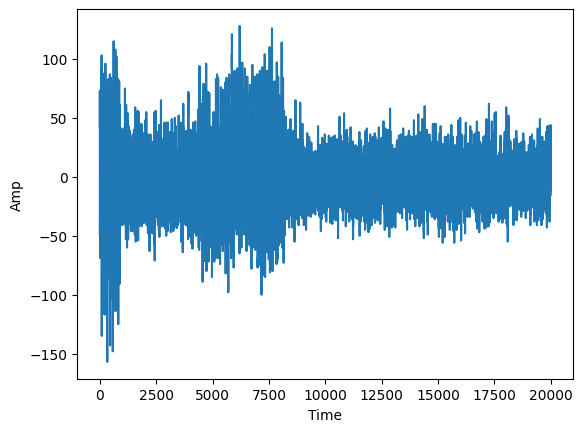

In [5]:
#Time Domain Data (x X time)
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amp')

Text(0, 0.5, 'Mag')

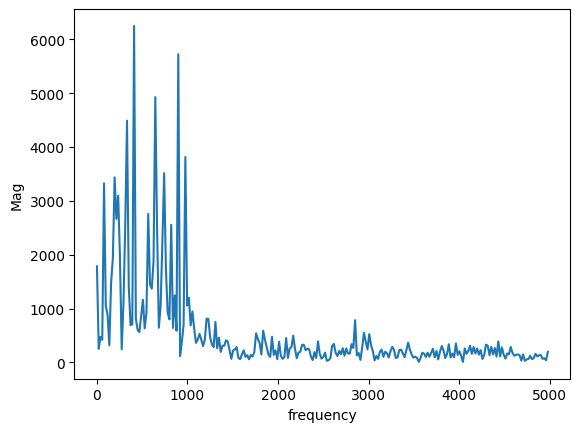

In [8]:

#NFFT  is the fourier transform, that handles data not evenly spaced in time 
nfft=512
y=np.abs(fft(x,nfft))
y=y[:nfft//2]

#
f = np.arange(0, nfft /2) * fs / nfft
#Frequency Domain (Mag X Freq)
plt.plot(f,y)
plt.xlabel('frequency')
plt.ylabel('Mag')


Text(0.5, 1.0, 'Spectrogram')

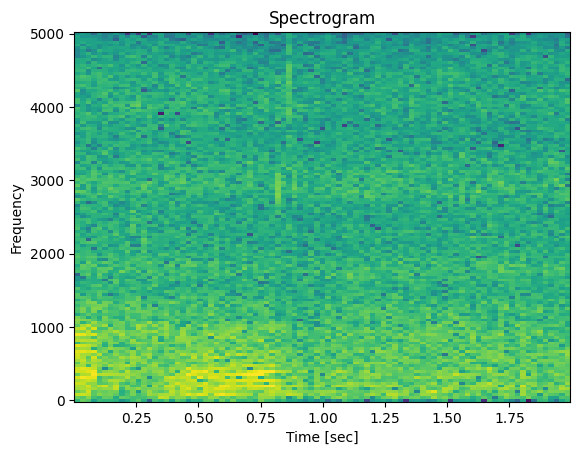

In [44]:
f, t, Sxx = spectrogram(x, fs)
# plt.pcolormesh(t,f,20*np.log10(Sxx))
plt.pcolormesh(t,f,10*np.log10(Sxx))
plt.ylabel('Frequency')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')

Text(0.5, 1.0, 'Spectrogram')

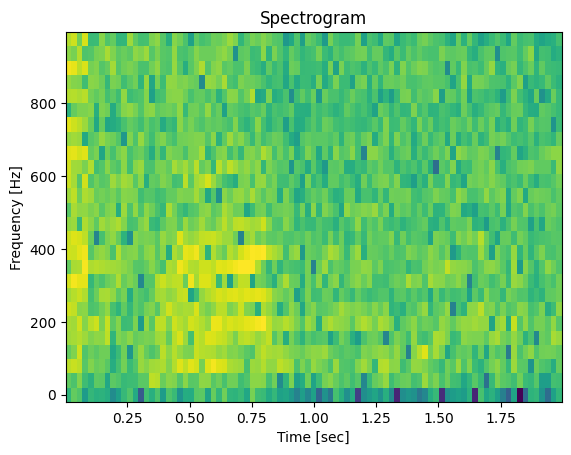

In [45]:
freq_min=0
freq_max=1000
f_mask=(f>=freq_min)&(f<=freq_max)
Sxx=Sxx[f_mask,:] #masking / isolating the sound 
f = f[f_mask]  

plt.pcolormesh(t,f,10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')

In [46]:
import os
#creates folder for spectrogram images 
os.makedirs("Spec_IMG", exist_ok=True)

In [47]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')

plt.savefig("Spec_IMG/spectrogram.png")   # Save image
plt.close()  # Prevents it from showing if you don't want it


In [11]:
print(f.shape)

(129,)
